- inner loop: grid search. select the maximum parameters over the validation set.
- outer loop: cross validation score. average the test set scores over several datasets splits.

The example below uses a support vector classifier with a non-linear kernel to build a model with optimized hyperparameters by grid search. We compare the performance of non-nested and nested CV strategies by taking the difference between their scores.



In [1]:
# load from sklearn.datasets the package
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np 


In [3]:
# number of random trials
num_trials = 30

# load dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# set up parameters
p_grid = {"C": [1,10,100], "gamma":[0.01,0.1]}

# use SVC with 'rbf' kerner 用于分类
svm = SVC(kernel='rbf')

# arrays to store scores
non_nested_scores = np.zeros(num_trials)
nested_scores = np.zeros(num_trials)


In [6]:
# loop for each trail 
for i in range(num_trials):
    inner_cv = KFold(n_splits=4,shuffle=True,random_state=i)
    outer_cv = KFold(n_splits=4,shuffle=True,random_state=i)
    # non-nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid,cv=inner_cv)
    clf.fit(X_iris,y_iris)
    non_nested_scores[i] = clf.best_score_ # maximum

    # nested CV with parameter optimization
    nested_score = cross_val_score(clf,X=X_iris,y=y_iris,cv=outer_cv)
    nested_scores[i] = nested_score.mean()


KeyboardInterrupt: 

In [ ]:
# comparasion 
score_difference = non_nested_scores - nested_scores
print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))


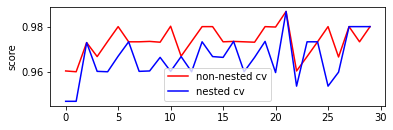

In [23]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores,color = 'r')
nested_scores_line, = plt.plot(nested_scores,color = 'b')
plt.ylabel('score')
plt.legend([non_nested_scores_line,nested_scores_line],["non-nested cv","nested cv"],)

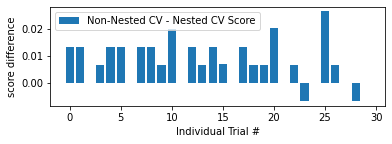

In [25]:
# Plot bar chart of difference
plt.subplot(212)
difference_plot = plt.bar(range(num_trials), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],)
plt.ylabel("score difference")

plt.show()